In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Data 

In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [3]:
electricity_feature=pd.read_csv("C:/Users/bahad/GitHub/360project_files/all_features_with_dummies.csv")

In [4]:
electricity_bulk=pd.read_csv("C:/Users/bahad/GitHub/360project_files/bulk_consumption_with_temp.csv")

## Data Preperation

In [5]:
daily_df=electricity_bulk.groupby(["Date"]).aggregate({"Consumption":np.sum,"T_1":np.average,"T_2":np.average,
                                                "T_3":np.average,"T_4":np.average,
                                                "T_5":np.average,"T_6":np.average,"T_7":np.average})

In [6]:
daily_df.head()

,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7
Date,,,,,,,,
2017-01-01,623400.3290,-10.125417,6.165833,2.808333,-13.216250,-10.742083,-8.598333,2.686250
2017-01-02,751052.6005,-6.708333,4.796250,4.006250,-7.811250,-10.286667,-8.620000,4.612500
2017-01-03,784007.3684,-11.472083,6.831250,6.855833,-12.375417,-8.823333,-7.560417,6.757083
2017-01-04,796581.9496,-5.925000,6.281667,9.918333,-9.135000,-4.368750,-6.557083,8.175417
2017-01-05,787799.5174,0.407917,6.839583,12.559167,-1.207917,1.276250,-1.937917,9.243750


In [7]:
daily_df.reset_index(inplace=True)

In [8]:
electricity_feature.head()

,date,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,...,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown
0,2017-01-01,0.0,558,77.0,20.5219,3.5277,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-02,0.0,558,77.0,20.5219,3.5445,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-03,0.0,559,77.0,20.5219,3.5943,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-04,0.0,560,77.0,20.5219,3.5713,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-05,0.0,561,77.0,20.5219,3.5927,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df=pd.merge(electricity_feature,daily_df,left_on=["date"], right_on=["Date"],how="left")
df.drop(["Date"], axis=1, inplace=True)
df.dropna(inplace=True)

## Data Control

In [10]:
pd.set_option("display.max.column", None)

In [11]:
df["date"]=pd.to_datetime(df["date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               1468 non-null   datetime64[ns]
 1   covid_severity                     1468 non-null   float64       
 2   sunlight_time_minutes              1468 non-null   int64         
 3   production_capacity_rate           1468 non-null   float64       
 4   price_of_electricity               1468 non-null   float64       
 5   usdtry                             1468 non-null   float64       
 6   monday                             1468 non-null   int64         
 7   tuesday                            1468 non-null   int64         
 8   wednesday                          1468 non-null   int64         
 9   thursday                           1468 non-null   int64         
 10  friday                             1

In [13]:
df.describe()

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,8.493751,731.542234,75.770572,34.636011,5.308254,0.143052,0.143052,0.143052,0.143052,0.142371,0.142371,0.143052,0.089237,0.076975,0.084469,0.081744,0.084469,0.081744,0.084469,0.084469,0.081744,0.084469,0.081744,0.084469,0.003406,0.016349,0.010899,0.002725,0.008174,0.002725,0.006131,0.017030,0.005450,0.002725,0.023161,779330.295689,9.931995,19.571432,17.998454,12.431072,12.341581,11.809680,16.600049
std,17.758964,122.018393,3.695485,12.126134,1.359174,0.350245,0.350245,0.350245,0.350245,0.349549,0.349549,0.350245,0.285183,0.266643,0.278184,0.274067,0.278184,0.274067,0.278184,0.278184,0.274067,0.278184,0.274067,0.278184,0.058281,0.126856,0.103864,0.052146,0.090073,0.052146,0.078086,0.129427,0.073645,0.052146,0.150465,82599.867434,8.081336,7.788713,7.296419,8.773344,7.938890,8.534671,6.987091
min,0.000000,553.000000,61.600000,20.521900,3.404500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457272.130000,-12.500417,0.254583,-1.230000,-15.277500,-11.078750,-10.172083,-3.346250
25%,0.000000,613.000000,75.300000,21.973500,3.812750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,726899.767000,3.310417,12.854479,12.104896,5.549896,6.140000,4.718438,10.703229
50%,0.000000,733.000000,76.400000,36.450900,5.502800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,780533.640000,9.912083,20.009167,17.866458,12.719583,12.818333,12.006667,16.679167
75%,0.000000,850.000000,77.825000,48.794100,6.091900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,832316.729225,17.487604,27.238437,24.743854,20.312292,19.253229,19.357187,23.405625
max,100.000000,908.000000,79.900000,55.154400,8.520000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,968047.930000,24.741250,33.643333,32.945417,27.974583,27.962500,28.575000,29.695833


# Performance Function

In [14]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

# Data Splitting

In [15]:
def Splitting_data(dataset, ratio):
    interval=dataset.date.max()-dataset.date.min()
    day_int=interval*ratio
    Train=dataset[dataset["date"]<(dataset.date.max()-day_int)]
    Test=dataset[dataset["date"]>=(dataset.date.max()-day_int)]
    return Train, Test

### Train & Test

In [16]:
train1_initial, test1_initial=Splitting_data(df, 0.2)

### Date and Customer Drop

In [17]:
train=train1_initial.drop(["date"], axis=1)
test=test1_initial.drop(["date"], axis=1)

In [18]:
X_train, y_train=train.drop(["Consumption"], axis=1), train["Consumption"]
X_test, y_test=test.drop(["Consumption"], axis=1), test["Consumption"]

# Linear Regression-Elastic Net

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.linear_model import ElasticNet

### Grid

In [21]:
elastic_net_model = ElasticNet()

In [22]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [23]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [24]:
elastic_net.fit(X_train, y_train)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6669010704.361328, tolerance: 556522538.1889884
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71956342724.68945, tolerance: 601827273.236672
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218763037522.41333, tolerance: 631834929.0963598
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1066103519.7495117, tolerance: 601827273.236672
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1382090070.3276367, tolerance: 631834929.0963598
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861666766.2607422, tolerance: 596836083.4914088
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [25]:
elastic_predictions=elastic_net.predict(X_test)

In [26]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [27]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,294,832671.337075,56601.614973,0.055589,0.059031,0.070106,4608.960421,56049.339779,0.067313


# Support Vector Machines

### Grid

In [28]:
elastic_net_model = ElasticNet()

In [29]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [30]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [31]:
from sklearn.svm import LinearSVR

In [32]:
sv_regressor=LinearSVR()

### Grid

In [33]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [34]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [35]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [36]:
from sklearn.svm import SVR

### Grid

In [37]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [38]:
sv_regressor_poly=SVR(kernel="poly")

In [39]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [40]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [41]:
sv_regressor_poly.best_estimator_

SVR(degree=2, epsilon=0.02, kernel='poly')

### Predictions

In [42]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [43]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [44]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [45]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

### Results

In [46]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,294,793054.191705,26377.812662,0.008411,0.007201,0.11757,6501.858887,93398.873693,0.117771


In [47]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,294,777403.823688,7.044627,-0.011552,-0.011551,0.116026,6290.381813,90199.137247,0.116026


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Grid

In [49]:
param_grid=[
    {"n_estimators":[100,200,300,400,500], "max_features":[2,4,6],
     "bootstrap":[False,True]}
]

In [50]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True], 'max_features': [2, 4, 6],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True)

In [52]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 200}

### Results

In [53]:
rf_predictions=grid_search.predict(X_test)

In [54]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [55]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,294,797183.987299,53591.698822,0.013547,0.016095,0.075628,4417.8059,59491.265449,0.074627


# Feature Extraction

In [56]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [57]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [58]:
on_leaf = estimator.apply(X_train)

In [59]:
X_train_ext=X_train[:]

In [60]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
X_train_ext

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,T_1,T_2,T_3,T_4,T_5,T_6,T_7,Node
0,0.0,558,77.0,20.5219,3.5277,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-10.125417,6.165833,2.808333,-13.216250,-10.742083,-8.598333,2.686250,32
1,0.0,558,77.0,20.5219,3.5445,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.708333,4.796250,4.006250,-7.811250,-10.286667,-8.620000,4.612500,5
2,0.0,559,77.0,20.5219,3.5943,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-11.472083,6.831250,6.855833,-12.375417,-8.823333,-7.560417,6.757083,5
3,0.0,560,77.0,20.5219,3.5713,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.925000,6.281667,9.918333,-9.135000,-4.368750,-6.557083,8.175417,5
4,0.0,561,77.0,20.5219,3.5927,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.407917,6.839583,12.559167,-1.207917,1.276250,-1.937917,9.243750,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,18.0,716,75.3,48.7941,6.3321,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.684583,14.877083,15.361667,11.943750,8.348750,11.010833,8.520833,38
1170,32.0,718,75.3,48.7941,6.4315,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.338750,14.633333,8.996667,2.468333,1.266250,1.752500,6.087917,13
1171,29.0,721,75.3,48.7941,6.3974,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-4.120833,8.141667,6.090833,-3.455000,-1.262083,-1.965000,6.103333,8
1172,35.0,724,75.3,48.7941,6.4752,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-6.050833,7.337083,6.300833,-3.400417,-1.107917,-1.837083,5.969583,8


### Test Node Selection

In [62]:
on_leaf_test = estimator.apply(X_test)

In [63]:
X_test_ext=X_test[:]

In [64]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
X_test_ext

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,T_1,T_2,T_3,T_4,T_5,T_6,T_7,Node
1174,40.000000,729,75.3,48.7941,6.5525,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2.976667,8.306667,8.210833,-1.405833,0.852500,-0.601667,8.315000,8
1175,40.000000,733,75.3,48.7941,6.5525,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.006667,10.018333,10.610000,1.747500,4.739167,2.472500,10.455833,9
1176,40.000000,735,75.3,48.7941,6.5525,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.736667,10.882500,12.765833,4.895000,8.415833,6.078333,11.390833,38
1177,40.000000,738,75.3,48.7941,6.5617,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.592500,12.150417,13.067500,7.250833,8.934167,9.237917,8.959167,9
1178,38.000000,741,75.3,48.7941,6.4203,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.772917,15.300000,12.762500,8.393333,7.504583,9.070000,8.824167,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,29.674820,559,75.4,55.1544,7.4392,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.275000,14.590000,11.783333,4.312083,6.190833,4.259583,12.709167,37
1464,25.520345,560,75.4,55.1544,7.4198,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.093750,13.920000,13.113750,4.164583,6.160000,4.292083,13.210833,13
1465,26.707338,561,75.4,55.1544,7.3856,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.450833,13.064167,13.552917,6.442500,6.557500,4.482917,12.761250,13
1466,24.926848,562,75.4,55.1544,7.3047,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.069167,13.017500,11.558333,5.268750,5.084167,4.445000,12.078333,9


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [66]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [67]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Consumption"].shift(+1)

In [68]:
concated_df.iloc[len(X_train):]["new_feature"]

1174    860904.58
1175    797289.81
1176    683480.46
1177    757048.53
1178    825432.12
          ...    
1463    740596.36
1464    726646.43
1465    853158.67
1466    672869.96
1467    881358.19
Name: new_feature, Length: 294, dtype: float64

In [69]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Consumption","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Consumption"]

In [70]:
train_new=concated_df.iloc[:len(X_train)]

In [71]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
X_train_new=train_new.drop(["Consumption","Node"], axis=1)

y_train_new=train_new["Consumption"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [73]:
elastic_net_model_new = ElasticNet()

In [74]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [75]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [76]:
elastic_net_new.fit(X_train_new, y_train_new)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828158159.9190674, tolerance: 600534955.5947286
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8717775256.933594, tolerance: 611552129.2114608
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006333188.0982666, tolerance: 600534955.5947286
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converg

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [77]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [78]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [79]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,294,810598.411172,91817.229112,0.029872,0.031173,0.049852,3006.776248,38404.390044,0.047378


### SVM

#### Linear

In [80]:
sv_regressor_new=LinearSVR()

### Grid

In [81]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [82]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [83]:
sv_regressor_new.fit(X_train_new, y_train_new)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [84]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,294,757066.811564,102828.00607,-0.038725,-0.041525,0.063315,3565.829346,45262.889538,0.059787


## Poly

### Grid

In [85]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [86]:
sv_regressor_poly_new=SVR(kernel="poly")

In [87]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [88]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [89]:
sv_regressor_poly_new.best_estimator_

SVR(degree=4, epsilon=0.02, kernel='poly')

In [90]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,294,777889.061438,184.265618,-0.010921,-0.010893,0.115673,6279.050412,89980.847923,0.115673


### Random Forest

In [91]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [92]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 300}

In [93]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,294,793680.472481,61219.529568,0.009193,0.012634,0.061221,3590.720451,47285.3713,0.059577


# General Result Table

In [94]:
pd.options.display.float_format = '{:,.8f}'.format

In [95]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [96]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,294,"832,671.33707467","56,601.61497326",0.05558878,0.05903141,0.07010579,"4,608.96042072","56,049.33977947",0.06731268
1,Support Vector Regressor Linear Performance,294,"793,054.19170530","26,377.81266248",0.00841057,0.00720121,0.11757010,"6,501.85888717","93,398.87369319",0.11777111
2,Support Vector Regressor Polynomial Performance,294,"777,403.82368812",7.04462682,-0.01155170,-0.01155143,0.11602630,"6,290.38181255","90,199.13724725",0.11602610
3,Random Forest Performance,294,"797,183.98729884","53,591.69882204",0.01354748,0.01609518,0.07562761,"4,417.80590049","59,491.26544919",0.07462677
4,Elastic Net Performance with Feature Extraction,294,"810,598.41117245","91,817.22911179",0.02987207,0.03117320,0.04985203,"3,006.77624797","38,404.39004350",0.04737783
5,SVR Linear Performance with Feature Extraction,294,"757,066.81156448","102,828.00607013",-0.03872491,-0.04152505,0.06331491,"3,565.82934573","45,262.88953757",0.05978718
6,SVR Polynomail Performance with Feature Extrac...,294,"777,889.06143773",184.26561780,-0.01092070,-0.01089287,0.11567291,"6,279.05041197","89,980.84792257",0.11567311
7,Random Forest Performance with Feature Extraction,294,"793,680.47248057","61,219.52956818",0.00919301,0.01263352,0.06122071,"3,590.72045132","47,285.37130027",0.05957734


## SVR polynomial Overfitting

In [97]:
svm_control=sv_regressor_poly.predict(X_train)

performance_list("SVR Performance without Feature Extraction",svm_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Performance without Feature Extraction,1174,"777,405.33241780",6.98833131,-0.00020388,-0.00020392,0.07598550,"2,187.32157655","59,071.41308051",0.07598535


In [98]:
svm_control_feature=sv_regressor_poly_new.predict(X_train_new)

performance_list("SVR Performance with Feature Extraction", svm_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Performance with Feature Extraction,1151,"777,859.62226028",134.54970404,-0.00028907,-0.00027461,0.07541100,"2,193.82587861","58,660.60903367",0.07541285


# Feature Control

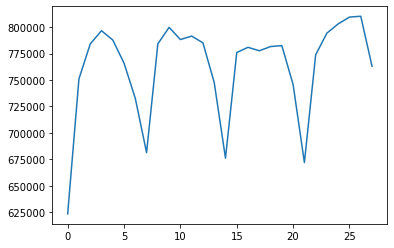

In [99]:
plt.plot(concated_df.Consumption[:28])

In [100]:
from statsmodels.graphics.tsaplots import plot_acf

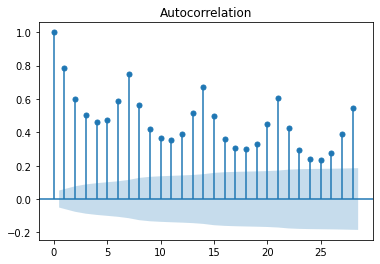

In [101]:
plot_acf(concated_df.Consumption, lags=28)
plt.show()

## Node Control

In [102]:
concated_df.Node.value_counts()

13    466
5     185
12    114
15     99
23     97
38     90
20     68
8      64
6      40
9      38
21     22
26     21
24     20
39     20
43     17
32     15
37     15
41     15
34     14
27     13
33     13
16     11
44     11
Name: Node, dtype: int64

In [103]:
concated_df[concated_df["Node"]==6]

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,T_1,T_2,T_3,T_4,T_5,T_6,T_7,Node,Consumption,new_feature
6,0.00000000,563,77.00000000,20.52190000,3.64450000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.88958333,7.68958333,-0.44208333,-1.14916667,-3.34250000,-0.89833333,-2.76041667,6,"732,640.45160000",nan
13,0.00000000,573,77.00000000,20.52190000,3.72300000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.75125000,5.96958333,8.77583333,-5.36708333,-1.64333333,-5.69000000,8.04500000,6,"747,621.66480000","732,640.45160000"
20,0.00000000,584,77.00000000,20.52190000,3.76550000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4.40541667,6.85916667,4.77041667,-3.57250000,-1.87458333,-2.88750000,3.19666667,6,"745,628.12050000","747,621.66480000"
27,0.00000000,598,77.00000000,20.52190000,3.87750000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-10.72958333,1.94125000,2.18916667,-11.24500000,-9.33375000,-7.35333333,1.58666667,6,"763,016.22190000","745,628.12050000"
34,0.00000000,613,76.80000000,20.52190000,3.69760000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.82166667,6.72166667,11.39500000,-1.71500000,3.17708333,0.38375000,9.93666667,6,"749,330.82650000","763,016.22190000"
41,0.00000000,630,76.80000000,20.52190000,3.69530000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50375000,10.38291667,6.75000000,0.46000000,0.48125000,0.60833333,4.46375000,6,"749,705.59580000","749,330.82650000"
48,0.00000000,648,76.80000000,20.52190000,3.62900000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4.09833333,5.57916667,9.27083333,-1.02875000,2.39291667,-0.72916667,6.63416667,6,"756,845.81220000","749,705.59580000"
55,0.00000000,666,76.80000000,20.52190000,3.60700000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.41083333,11.70666667,13.41041667,0.42750000,7.90000000,5.51791667,11.08750000,6,"730,370.30980000","756,845.81220000"
62,0.00000000,685,76.70000000,20.52190000,3.70290000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.38416667,10.55750000,13.29208333,3.78958333,6.71791667,4.40125000,9.86583333,6,"710,425.71080000","730,370.30980000"
69,0.00000000,704,76.70000000,20.52190000,3.72990000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.19875000,11.86000000,12.37583333,5.43083333,8.09375000,6.93791667,8.59458333,6,"710,991.32440000","710,425.71080000"


In [104]:
concated_df[concated_df["Node"]==10]

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,T_1,T_2,T_3,T_4,T_5,T_6,T_7,Node,Consumption,new_feature


In [105]:
concated_df[concated_df["Node"]==19]

,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,usdtry,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec,new_year,nat_holiday,sacrifice_holiday,sacrifice_eve,ramadan_holiday,ramadan_eve,monday_or_friday_between_holidays,extra_holidays,extra_holidays_2,partial_lockdown,full_lockdown,T_1,T_2,T_3,T_4,T_5,T_6,T_7,Node,Consumption,new_feature


# General Function

In [106]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    train1_initial, test1_initial=Splitting_data(df, 0.2)
    train=train1_initial.drop(["date"], axis=1)
    test=test1_initial.drop(["date"], axis=1)
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Consumption"], axis=1), train["Consumption"]
    X_test, y_test=test.drop(["Consumption"], axis=1), test["Consumption"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[100,200,300,400,500], "max_features":[2,4,6],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [107]:
res1=result_obtain(df.copy(), df["Consumption"].shift(+1), "lag1", 1)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4007241134.5335693, tolerance: 599665964.3846823
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2785239104.897461, tolerance: 629556533.8841395
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1650326461.8590088, tolerance: 594397185.8532169
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not conver

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [108]:
res7=result_obtain(df.copy(), df["Consumption"].shift(+7), "lag7", 7)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3684295810.0791016, tolerance: 559008198.1839615
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25474964360.30371, tolerance: 598796879.3473035
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116440318096.79639, tolerance: 630046850.570045
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converg

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

In [109]:
res14=result_obtain(df.copy(), df["Consumption"].shift(+14), "lag14", 14)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40217787189.06763, tolerance: 613055666.5608267
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143292361890.0525, tolerance: 626730453.4021449
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16287425517.625977, tolerance: 599611454.1412503
  positive)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converg

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

In [110]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,294,"805,435.33616331","94,832.16972065",0.02365327,0.02537371,0.03447854,"2,086.45387243","26,188.63418589",0.03251488
0,SVR Linear Performance Lag 1,294,"791,426.84254029","107,664.64236016",0.00637164,0.00341962,0.05646569,"3,364.05870928","42,394.42228469",0.05356708
0,SVR Polynomial Performance Lag 1,294,"777,516.51326230",87.76927671,-0.01140509,-0.01139186,0.11590396,"6,285.59642826","90,116.86306044",0.11590347
0,Random Forest Performance Lag 1,294,"798,626.00479962","60,608.00336045",0.01532864,0.01896971,0.05757046,"3,530.21204488","44,670.96543322",0.05593477


In [111]:
res14

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 14,294,"830,020.89828675","68,935.47859820",0.05257306,0.05561254,0.06425792,"4,203.96629299","51,118.70588563",0.06158725
0,SVR Linear Performance Lag 14,294,"744,273.93069349","100,413.10769798",-0.05657893,-0.06168893,0.09022740,"4,732.40146284","62,945.66341155",0.08457325
0,SVR Polynomial Performance Lag 14,294,"777,252.15189451",76.42101913,-0.01174909,-0.01173846,0.11601947,"6,287.73788322","90,176.40897667",0.11601950
0,Random Forest Performance Lag 14,294,"794,409.11154109","54,415.91284420",0.01010179,0.01328163,0.06924909,"4,059.06715982","54,220.24935245",0.06825230


In [112]:
res7

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 7,294,"828,281.29515805","76,780.16465902",0.05058322,0.05335567,0.06124147,"3,877.34736415","48,575.30330017",0.05864590
0,SVR Linear Performance Lag 7,294,"1,032,265.52223485","139,723.57128317",0.23819585,0.23547174,0.23777444,"15,031.03287388","247,452.58328597",0.23971796
0,SVR Polynomial Performance Lag 7,294,"777,524.44729030",85.35304650,-0.01139477,-0.01138217,0.11590536,"6,285.76555358","90,118.99324211",0.11590503
0,Random Forest Performance Lag 7,294,"795,761.14755575","57,503.77435786",0.01178367,0.01515115,0.06454332,"3,818.98434076","50,277.44652508",0.06318158


In [113]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,294,"832,671.33707467","56,601.61497326",0.05558878,0.05903141,0.07010579,"4,608.96042072","56,049.33977947",0.06731268
1,Support Vector Regressor Linear Performance,294,"793,054.19170530","26,377.81266248",0.00841057,0.00720121,0.11757010,"6,501.85888717","93,398.87369319",0.11777111
2,Support Vector Regressor Polynomial Performance,294,"777,403.82368812",7.04462682,-0.01155170,-0.01155143,0.11602630,"6,290.38181255","90,199.13724725",0.11602610
3,Random Forest Performance,294,"797,183.98729884","53,591.69882204",0.01354748,0.01609518,0.07562761,"4,417.80590049","59,491.26544919",0.07462677
4,Elastic Net Performance with Feature Extraction,294,"810,598.41117245","91,817.22911179",0.02987207,0.03117320,0.04985203,"3,006.77624797","38,404.39004350",0.04737783
5,SVR Linear Performance with Feature Extraction,294,"757,066.81156448","102,828.00607013",-0.03872491,-0.04152505,0.06331491,"3,565.82934573","45,262.88953757",0.05978718
6,SVR Polynomail Performance with Feature Extrac...,294,"777,889.06143773",184.26561780,-0.01092070,-0.01089287,0.11567291,"6,279.05041197","89,980.84792257",0.11567311
7,Random Forest Performance with Feature Extraction,294,"793,680.47248057","61,219.52956818",0.00919301,0.01263352,0.06122071,"3,590.72045132","47,285.37130027",0.05957734


# Deep Learning Codes